## Imports

In [426]:
import tkinter
from tkinter import ttk
import sv_ttk
import tkinter as tk
from tkinter import filedialog, messagebox
import numpy as np
import cmath
import math
from tkinter import filedialog
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from DSPTask import AddSignalSamplesAreEqual,Folding,ShiftSignalByConst,MultiplySignalByConst,SubSignalSamplesAreEqual
from QuanTest1 import QuantizationTest1
from QuanTest2 import QuantizationTest2
from signalcompare import *
from CompareSignal import *
from CompareSignalFilter import *
import os  
# Global array to hold the signals
signals = []
sig1 = []
sig2 = []

## Task one Code

In [427]:
def read_signal(File=None):
    # Set file_path inside the function
    if File is None:
        file_path = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
    else:
        file_path = File

    if not file_path:
        return None  # If no file is selected, return None

    # Open and read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    N = int(lines[2].strip())  # First row: number of samples
    indices = []
    values = []

    # Extract indices and values
    for i in range(3, N + 3):
        parts = lines[i].strip().split()
        indices.append(float(parts[0].replace('f', '')))  # Sample index as float
        values.append(float(parts[1].replace('f', '')))  # Sample value as float

    # If File is None, append to global signals list
    if File is None:
        signals.append([indices, values])
        print(f"Signal {len(signals)} loaded.")
    else:
        return [indices, values]

    return 1  # Return 0 if signal was successfully loaded

def read_signal_2(index):
    global sig1, sig2

    num = read_signal()
    if num:
        if(index==1):
            sig1 = signals[-1]
        elif(index==2):
            sig2 = signals[-1]
    #print(sig1,sig2)
    
def normal_plt(type, index ,signal,signalName = "signal", Title= "singal"):
    
    if type == 1:
        for widget in frame_before.winfo_children():
                widget.destroy()
    else:
        for widget in frame_after.winfo_children():
            widget.destroy()
    dark_bg_color = "#1e1e1e"  # Dark background color
    text_color = "#c7c7c7"     # Light text color
    grid_color = "#444444"     # Grid line color
    line_color_signal1 = "#4CAF50"  # Green for first signal
    #line_color_signal2 = "#FF5722"  # Orange for second signal

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    fig.patch.set_facecolor(dark_bg_color)  # Set figure background to dark color
    ax.set_facecolor(dark_bg_color)
    ax.tick_params(axis='both', colors=text_color)  # Set tick colors
    ax.spines['bottom'].set_color(text_color)       # Set x-axis spine to light color
    ax.spines['left'].set_color(text_color)         # Set y-axis spine to light color


    ax.plot(index, signal, label=f"{signalName}", color=line_color_signal1)
        # Apply labels, title, and grid
    ax.set_xlabel('Index', color=text_color)
    ax.set_ylabel('Signal Value', color=text_color)
    ax.set_title(f"{Title} ",  color=text_color)
    ax.grid(True, color=grid_color, linestyle='--', alpha=0.5)

    # Add a legend with dark mode styling
    ax.legend(facecolor=dark_bg_color, edgecolor=text_color, labelcolor=text_color)


    # Create the canvas
    if type == 1:
        canvas = FigureCanvasTkAgg(fig, master=frame_before)
    else:
        canvas = FigureCanvasTkAgg(fig, master=frame_after)

    canvas.draw()

    # Pack the canvas
    canvas.get_tk_widget().pack()

def plot_signal(signal_index, frame, second_signal_index=None, title=""):
    # Clear the previous plots in the frame
    for widget in frame.winfo_children():
        widget.destroy()

    # Extract the first signal's data
    times = signals[signal_index][0]
    values = signals[signal_index][1]

    # Dark mode style properties
    dark_bg_color = "#1e1e1e"  # Dark background color
    text_color = "#c7c7c7"     # Light text color
    grid_color = "#444444"     # Grid line color
    line_color_signal1 = "#4CAF50"  # Green for first signal
    line_color_signal2 = "#FF5722"  # Orange for second signal

    # Create the plot using matplotlib
    fig, ax = plt.subplots()

    # Set the figure size dynamically based on the frame's dimensions
    fig.set_size_inches((frame.winfo_width() / fig.dpi) - 5, (frame.winfo_height() / fig.dpi) - 5)

    # Apply dark mode styles
    fig.patch.set_facecolor(dark_bg_color)  # Set figure background to dark color
    ax.set_facecolor(dark_bg_color)
    ax.tick_params(axis='both', colors=text_color)  # Set tick colors
    ax.spines['bottom'].set_color(text_color)       # Set x-axis spine to light color
    ax.spines['left'].set_color(text_color)         # Set y-axis spine to light color

    # Plot the first signal
    ax.stem(times, values, linefmt=line_color_signal1, markerfmt='go', basefmt=" ", label=f'Signal {signal_index + 1}')

    # Plot the second signal if provided
    if second_signal_index is not None:
        times_2 = signals[second_signal_index][0]
        values_2 = signals[second_signal_index][1]
        ax.stem(times_2, values_2, linefmt=line_color_signal2, markerfmt='ro', basefmt=" ", label=f'Signal {second_signal_index + 1}')

    # Add a horizontal line at y = 0 and color it white
    ax.axhline(y=0, color="white", linestyle='-', linewidth=1.5)

    # Apply labels, title, and grid
    ax.set_xlabel('Index', color=text_color)
    ax.set_ylabel('Signal Value', color=text_color)
    ax.set_title(title, color=text_color)
    ax.grid(True, color=grid_color, linestyle='--', alpha=0.5)

    # Add a legend with dark mode styling
    ax.legend(facecolor=dark_bg_color, edgecolor=text_color, labelcolor=text_color)

    # Set x-axis ticks to integers
    rounded_times = [round(x) for x in times]
    ax.set_xticks(range(min(rounded_times), max(rounded_times) + 1))

    # Apply tight layout to ensure nothing is cut off
    plt.tight_layout()

    # Embed the plot into the Tkinter frame
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas_widget = canvas.get_tk_widget()

    # Use grid instead of pack and ensure full expansion of canvas
    canvas_widget.grid(row=0, column=0, sticky="nsew")

    # Configure the frame's grid layout to allow resizing
    frame.rowconfigure(0, weight=1)
    frame.columnconfigure(0, weight=1)

    # Draw the canvas
    canvas.draw()

    # Make sure the figure does not get cropped
    fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

def display_frequency_domain(Fs, amplitudes, phase_shifts, N):
    # Frequency axis (in Hz)

    for widget in frame_after.winfo_children():
        widget.destroy()

    for widget in frame_before.winfo_children():
        widget.destroy()


    frequencies = [(Fs * k) / N for k in range(N)]

    Ns=1/Fs
    x_axis=[]
    init_x_axis=2*cmath.pi/(Ns*(1/Ns))
    print("init_x_axis : ",init_x_axis)
    f=0
    for i in range(len(amplitudes)):
        f+=init_x_axis
        x_axis.append(round(f,5))
    print("x_axis : ",x_axis)

    frequencies = x_axis



    # Dark mode style properties
    dark_bg_color = "#1e1e1e"  # Dark background color
    text_color = "#c7c7c7"     # Light text color
    grid_color = "#444444"     # Grid line color
    line_color_amplitude = "#4CAF50"  # Green for amplitude
    line_color_phase = "#FF5722"      # Orange for phase

    # Plot Frequency vs Amplitude in frame_amplitude
    fig_amplitude = plt.Figure(figsize=(5, 4), dpi=100, facecolor=dark_bg_color)
    ax_amplitude = fig_amplitude.add_subplot(111)
    markerfmt_amplitude = 'go'  # Green markers for amplitude
    basefmt_amplitude = "white"  # White baseline for amplitude

    # Amplitude Stem Plot
    ax_amplitude.stem(
        frequencies,
        amplitudes,
        linefmt=line_color_amplitude,
        markerfmt=markerfmt_amplitude,
        basefmt=basefmt_amplitude
    )
    ax_amplitude.set_title("Frequency vs Amplitude", color=text_color)
    ax_amplitude.set_xlabel("Frequency (Hz)", color=text_color)
    ax_amplitude.set_ylabel("Amplitude", color=text_color)
    ax_amplitude.grid(color=grid_color, linestyle='--', linewidth=0.5)
    ax_amplitude.set_facecolor(dark_bg_color)
    ax_amplitude.tick_params(colors=text_color)

    # Embed the amplitude plot in the Tkinter frame
    canvas_amplitude = FigureCanvasTkAgg(fig_amplitude, master=frame_before)
    canvas_amplitude.draw()
    canvas_amplitude.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

    # Plot Frequency vs Phase in frame_phase
    fig_phase = plt.Figure(figsize=(5, 4), dpi=100, facecolor=dark_bg_color)
    ax_phase = fig_phase.add_subplot(111)
    markerfmt_phase = 'ro'  # Red markers for phase
    basefmt_phase = "white"  # White baseline for phase

    # Phase Stem Plot
    ax_phase.stem(
        frequencies,
        phase_shifts,
        linefmt=line_color_phase,
        markerfmt=markerfmt_phase,
        basefmt=basefmt_phase
    )
    ax_phase.set_title("Frequency vs Phase", color=text_color)
    ax_phase.set_xlabel("Frequency (Hz)", color=text_color)
    ax_phase.set_ylabel("Phase (radians)", color=text_color)
    ax_phase.grid(color=grid_color, linestyle='--', linewidth=0.5)
    ax_phase.set_facecolor(dark_bg_color)
    ax_phase.tick_params(colors=text_color)

    # Embed the phase plot in the Tkinter frame
    canvas_phase = FigureCanvasTkAgg(fig_phase, master=frame_after)
    canvas_phase.draw()
    canvas_phase.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)


# Function to add two signals
def add_signals(signal1_index, signal2_index,frame_before,frame_after):
    indices1, values1 = signals[signal1_index]
    indices2, values2 = signals[signal2_index]
    plot_signal(signal1_index,frame_before,signal2_index,"Signals")

    combined_indices = sorted(set(indices1 + indices2))
    combined_values = []

    for idx in combined_indices:
        val1 = values1[indices1.index(idx)] if idx in indices1 else 0
        val2 = values2[indices2.index(idx)] if idx in indices2 else 0
        combined_values.append(val1 + val2)
    
    signals.append([combined_indices, combined_values])
    plot_signal(len(signals) - 1,frame_after,title="Result of Add")

    AddSignalSamplesAreEqual("Signal1.txt", "Signal2.txt",combined_indices,combined_values)

# Function to multiply a signal by a constant
def multiply_signal(signal_index, constant,frame_before,frame_after):
    indices, values = signals[signal_index]
    plot_signal(signal_index,frame_before,title="Signal")
    new_values = [val * constant for val in values]
    signals.append([indices, new_values])
    plot_signal(len(signals) - 1, frame_after,title="Result of Multiply")
    MultiplySignalByConst(5,indices, new_values)


# Function to subtract two signals
def subtract_signals(signal1_index, signal2_index,frame_before,frame_after):
    plot_signal(signal1_index,frame_before,signal2_index,"Signals")
    indices, values = signals[signal2_index]
    new_values = [val * -1 for val in values]
    signals.append([indices, new_values])
    
    indices1, values1 = signals[signal1_index]
    indices2, values2 = signals[len(signals)-1]



    combined_indices = sorted(set(indices1 + indices2))
    combined_values = []

    for idx in combined_indices:
        val1 = values1[indices1.index(idx)] if idx in indices1 else 0
        val2 = values2[indices2.index(idx)] if idx in indices2 else 0
        combined_values.append(val1 + val2)
    
    signals.append([combined_indices, combined_values])
    
    plot_signal(len(signals) - 1, frame_after, title="Suntraction")
    SubSignalSamplesAreEqual("Signal1.txt", "Signal2.txt",combined_indices,combined_values)



# Function to shift a signal by k steps
def shift_signal(signal_index, k,frame_before,frame_after):
    indices, values = signals[signal_index]
    plot_signal(signal_index,frame_before,title="Signal")
    tempk = k*-1
    new_indices = [idx + tempk for idx in indices]
    signals.append([new_indices, values])
    
    plot_signal(len(signals) - 1,frame_after,title="Shifted")
    ShiftSignalByConst(k,new_indices,values)


def fold_signal(signal_index,frame_before,frame_after,):
    indices, values = signals[signal_index]
    plot_signal(signal_index,frame_before,title="Signal")
    
    # Reverse indices by negating and creating a list of (negated index, value) pairs
    pairs = [(-idx, val) for idx, val in zip(indices, values)]
    
    pairs.sort(key=lambda pair: pair[0])
    
    new_indices, new_values = zip(*pairs)  # This unzips the pairs into two lists
    
    signals.append([list(new_indices), list(new_values)])
 
    plot_signal(len(signals) - 1,frame_after,title="Reversed signal")
    Folding(new_indices, new_values)


# Function to save the last generated signal to a text file
def save_signal():
    if not signals:
        print("No signal to save!")
        return
    
    file_path = filedialog.asksaveasfilename(defaultextension=".txt", filetypes=[("Text files", "*.txt")])
    if not file_path:
        return

    indices, values = signals[-1]
    with open(file_path, 'w') as file:
        file.write(f"{len(indices)}\n")
        for idx, val in zip(indices, values):
            file.write(f"{idx} {val}\n")
    print(f"Signal saved to {file_path}")


## Task Two Code

In [428]:
def generate_signal(frame):
    # Retrieve user inputs
    signal_type = signal_type_var.get()
    amplitude = float(amplitude_entry.get())
    phase = float(phase_entry.get())
    analog_freq = float(analog_freq_entry.get())  # f (Hz)
    sampling_freq = float(sampling_freq_entry.get())  # fs (Hz)
    signal_mode = signal_mode_var.get()

    if sampling_freq < 2 * analog_freq:
        print("Sampling frequency must be greater than twice the analog frequency.")
        return

    duration = 1  # 1 second for visualization
    t = np.linspace(0, duration, int(sampling_freq))

    # Generate the signal based on user input
    if signal_type == 'Sine':
        signal = amplitude * np.sin(2 * np.pi * analog_freq * t + (phase * (np.pi / 180)))
    elif signal_type == 'Cosine':
        signal = amplitude * np.cos(2 * np.pi * analog_freq * t + (phase * (np.pi / 180)))
    else:
        return

    # Clear previous plot if it exists
    for widget in frame.winfo_children():
        widget.destroy()

    # Dark mode style properties
    dark_bg_color = "#1e1e1e"  # Dark background color
    text_color = "#c7c7c7"     # Light text color
    grid_color = "#444444"     # Grid line color
    line_color_continuous =   "#FF5722"# Green for continuous signal
    line_color_discrete = "#4CAF50"    # Orange for discrete signal
    base_line_color = "white"          # White for the x-axis line

    # Create a matplotlib figure and add it to the specified frame
    fig, ax = plt.subplots()
    fig.patch.set_facecolor(dark_bg_color)  # Set figure background to dark color
    ax.set_facecolor(dark_bg_color)         # Set axes background to dark color

    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas_widget = canvas.get_tk_widget()

    # Use grid instead of pack to ensure the canvas fits properly within the frame
    canvas_widget.grid(row=0, column=0, sticky="nsew")

    # Configure the frame's grid to make sure the canvas expands
    frame.rowconfigure(0, weight=1)
    frame.columnconfigure(0, weight=1)

    # Plot the signal based on the selected mode
    if signal_mode == 'Continuous':
        ax.plot(t, signal, label=signal_type, color=line_color_continuous, linewidth=1.5)  # Green for continuous
        ax.axhline(y=0, color=base_line_color, linewidth=1)  # White baseline at y=0
        ax.set_ylim([min(signal) - amplitude * 0.1, max(signal) + amplitude * 0.1])
    elif signal_mode == 'Discrete':
        ax.stem(t, signal, label=signal_type, linefmt=line_color_discrete, markerfmt='ro', basefmt=base_line_color)  # Orange for discrete
    elif signal_mode == 'C&D':
        # Plot both continuous and discrete signals
        ax.plot(t, signal, label=f'{signal_type} (Continuous)', color=line_color_continuous, linewidth=1.5)  # Green
        ax.stem(t, signal, label=f'{signal_type} (Discrete)', linefmt=line_color_discrete, markerfmt='ro', basefmt=base_line_color)  # Orange
    else:
        return

    # Set dark mode for axis labels, grid, and ticks
    ax.set_xlabel('Time (seconds)', color=text_color) 
    ax.set_ylabel('Amplitude', color=text_color)       
    ax.tick_params(axis='both', colors=text_color)     
    ax.spines['bottom'].set_color(text_color)          
    ax.spines['left'].set_color(text_color)

    # Add a grid with dark mode styling
    ax.grid(True, color=grid_color, linestyle='--', alpha=0.5)

    # Add a legend with dark mode styling
    ax.legend(facecolor=dark_bg_color, edgecolor=text_color, labelcolor=text_color)

    # Draw the updated canvas
    canvas.draw()


## Task Three Code

In [429]:

def calc_quant():
    # Retrieve user inputs
    user_input = signal_levels_entry.get()
        
    if radio_var.get() == "levels":  # User selected 'levels'
        signal_levels = int(user_input)
    else:  # User selected 'bits'
        bits = int(user_input)
        signal_levels = 2 ** bits

    input_signal = np.array(signals[-1][1])

    min_val, max_val = input_signal.min(), input_signal.max()
    
    # Calculate delta
    delta = (max_val - min_val) / signal_levels

    # ranges and midpoints
    ranges = [min_val + i * delta for i in range(signal_levels + 1)]
    midpoints = [(ranges[i] + ranges[i + 1]) / 2 for i in range(signal_levels)]
    
    # Generate codes
    codes = [format(i, f'0{int(np.log2(signal_levels))}b') for i in range(signal_levels)]

    # Generate indexes
    codes_by_int = [i + 1 for i in range(signal_levels)]

    # Quantization 
    quantized_signal = np.array([min(midpoints, key=lambda x: abs(x - sample)) for sample in input_signal])

    # Map each quantized value to its binary code
    encoding_dict = {midpoints[i]: codes[i] for i in range(signal_levels)}
    encoded_signal = [encoding_dict[q] for q in quantized_signal]

    # Create a mapping from quantized values to their corresponding integer codes
    int_encoding_dict = {midpoints[i]: codes_by_int[i] for i in range(signal_levels)}
    encoded_signal_by_int = [int_encoding_dict[q] for q in quantized_signal]

    # Calculate average power error
    quantization_error =  quantized_signal - input_signal
    average_power_error = np.mean(quantization_error ** 2)

    if radio_Tests.get() == "T1":
        QuantizationTest1("Quan1_Out.txt",encoded_signal, quantized_signal,)
    elif radio_Tests.get() == "T2":
        QuantizationTest2("Quan2_Out.txt",encoded_signal_by_int, encoded_signal, quantized_signal, quantization_error)
    
    for item in tree.get_children():
        tree.delete(item)

    for col in columns:
        tree.heading(col, text=col)
        tree.column(col, anchor="center")

    # Add rows to Treeview
    for i in range(len(encoded_signal)):
        tree.insert("", "end", values=(
            encoded_signal_by_int[i],
            encoded_signal[i],
            round(quantized_signal[i], 5),
            round(quantization_error[i], 5)
        ))

    
    plot_signal(len(signals)-1 , frame_before , title='Input signal')
    signals.append( [signals[-1][0] ,quantized_signal ] )
    plot_signal(len(signals)-1 , frame_after , title='Quantized signal')

    Avg_error_label.config(text="Average Power Error: " + str(np.round(average_power_error,5)))



## Task Four Code

In [430]:
def perform_conv(indices_one, samples_one, indices_two, samples_two):
    indices_conv = []
    samples_conv = []
    
    len_one = len(samples_one)
    len_two = len(samples_two)
    len_conv = (len_one + len_two - 1)
    
    samples_conv = [0] * len_conv
    first_index_conv = indices_one[0] + indices_two[0]
    last_index_conv = indices_one[len_one - 1] + indices_two[len_two -1]
    #indices_conv = list(range(first_index_conv, last_index_conv + 1))
    indices_conv = list(range(int(first_index_conv), int(last_index_conv) + 1))

    for n in range(len_conv):
        for m in range(len_one):
            if 0 <= n - m < len_two:
                samples_conv[n] += samples_one[m] * samples_two[n - m]
                
    return indices_conv, samples_conv

## Convolution 
def Convolution():
    global sig1, sig2
    if(sig1 == [] or sig2 == []):
        messagebox.showwarning("Warning", "Read Signals for Convolution")
        return 
    
    indices1, signal1 = sig1
    indices2, signal2 = sig2

    # Plot the signal before the filter
    #normal_plt(1, indices1, signal1, "Signal", "Signal before filter")


    result_indices, result_values =perform_conv(indices1,signal1,indices2,signal2)
    # # Calculate the start and end index for the result
    # start_index = indices1[0] + indices2[0]
    # end_index = indices1[-1] + indices2[-1]
    # result_indices = list(range(int(start_index), int(end_index + 1)))

    # # Prepare the result array
    # result_length = len(result_indices)
    # result_values = [0] * result_length

    # # Perform the convolution
    # for i1, v1 in zip(indices1, signal1):
    #     for i2, v2 in zip(indices2, signal2):
    #         result_index = i1 + i2
    #         result_position = int(result_index - start_index)  # Convert to integer
    #         result_values[result_position] += v1 * v2

    # Plot the result of the convolution
    normal_plt(2, result_indices, result_values, "Filtered signal", "Apply Filter")

    return result_indices, result_values

    
    #return result_indices, result_values


## Derivative 
def derivativeOne():
    index , signla =sig1
    signals.append( sig1 )
    plot_signal(len(signals)-1, frame_before, title="Readed signal ")
    #X = [1 ,2,3,4,5,4,3,2,1,0,-1,-2,-3,-4,-5,-4,-3,-2,-1,0]
    signla2 = []
    for i in range(1, len(signla)):  
        diff = signla[i] - signla[i - 1]
        signla2.append(diff)

    index2 = index[0:-1]
    signals.append( [index2,signla2] )
    plot_signal(len(signals)-1, frame_after, title="Result derivative One ")
    path = r"Derivative testcases\1st_derivative_out.txt"
    QuantizationTest1(path , index2, signla2 , True)
    #print(X2)
#derivativeOne(0)

def derivativeTwo():
    index , X = sig1
    #X = [1 ,2,3,4,5,4,3,2,1,0,-1,-2,-3,-4,-5,-4,-3,-2,-1,0]
    signals.append( sig1 )
    plot_signal(len(signals)-1, frame_before, title="Readed signal ")
    signla2 = []
    for i in range(1, len(X)-1):  
        diff = X[i+1] - (2 * X[i]) + X[i - 1]
        signla2.append(diff)

    index2 = index[0:-2]
    signals.append( [index2,signla2] )
    plot_signal(len(signals)-1, frame_after, title="Result derivative Two ")
    path = r"Derivative testcases\2nd_derivative_out.txt"
    QuantizationTest1(path , index2, signla2 , True)
    #print(X2)
    
#derivativeTwo(0)

## Moving Average

def moving_Average():
    window_size =  int(Window_size_entry.get())
    global sig1
    if(sig1 == [] ):
        messagebox.showwarning("Warning", "Read Signals or enter window_size")
        return 

    index, signal1 = sig1
    signals.append( sig1 )
    plot_signal(len(signals)-1, frame_before, title="Readed signal ")
    new_size = len(signal1)-window_size+1

    sig_out=[]


    for i in range(new_size):
        summ = sum(signal1[i:i + window_size])
        res=summ/window_size
        sig_out.append(round(res,10))

    result_indices = list(range(int(index[0]), new_size))
    
    
    signals.append( [result_indices,sig_out] )
    plot_signal(len(signals)-1, frame_after, title="Result Moving Average ")
    if(window_size == 3 ):
        path = r"Moving Average testcases\MovingAvg_out1.txt"
    elif(window_size == 5 ):
        path = r"Moving Average testcases\MovingAvg_out2.txt"

    QuantizationTest1(path , result_indices, sig_out , True)





## Task Five Code

In [431]:
import cmath
import math
import numpy as np

def calculate_dft(inputsignal=None, passFs=0):
    global signals
    signal = []

    # Determine sampling frequency and signal
    if passFs == 0:
        Fs = float(Sampling_Freq_Entry.get())  # Get sampling frequency from UI
        signal = signals[-1][1]  # Use the last signal in `signals`
    else:
        Fs = passFs
        signal = inputsignal

    # Ensure signal is a numeric array
    signal = np.asarray(signal, dtype=np.float64).flatten()  # Flatten to ensure 1D
    N = len(signal)  # Length of the signal

    # Initialize results
    dft_result = []

    # Compute DFT
    for k in range(N):  # Limit k to N for full DFT computation
        X_k = 0
        for n in range(N):
            X_k += signal[n] * cmath.exp(-2j * cmath.pi * k * n / N)
        dft_result.append(complex(X_k))  # Ensure each result is a complex scalar

    print("dft_result =", dft_result)

    # Compute amplitudes
    amplitudes = [abs(num) for num in dft_result]

    # Compute phase shifts using cmath.phase
    phase_shifts = [cmath.phase(num) for num in dft_result]

    print("amplitudes:", amplitudes)
    print("phase_shifts:", phase_shifts)

    # Save results in global signals list
    signals.append([amplitudes, phase_shifts])

    # Compare with expected output
    path = r"DFT\Output_Signal_DFT_A,Phase.txt"

    try:
        Amplit, Phase = read_signal(path)
        amplitude_match = SignalComapreAmplitude(SignalInput=amplitudes, SignalOutput=Amplit)
        phase_match = SignalComaprePhaseShift(SignalInput=phase_shifts, SignalOutput=Phase)
    except Exception as e:
        print(f"Error reading or comparing signals: {e}")
        amplitude_match = phase_match = False

    print("Amplitude match:", amplitude_match, "Phase match:", phase_match)
    print("Expected Amplitudes:", Amplit)
    print("Calculated Amplitudes:", amplitudes)

    # Display frequency domain representation
    display_frequency_domain(Fs, amplitudes, phase_shifts, N)

    return dft_result




# Calculate IDFT
def calculate_idft(signal= []):

    amplitudes , phase_shifts = []
    if signal == []:
        amplitudes , phase_shifts = signals[len(signals)-1]
    else:
        amplitudes , phase_shifts = signal
    N = len(amplitudes)




    idft_result = []
    for n in range(N):
        x_n = 0
        for k in range(N):
            # Reconstruct the complex number using amplitude and phase  =>polar form
            X_k = amplitudes[k] * cmath.exp(1j * phase_shifts[k])    #  {  cmath.exp(1j * phase_shifts[k])  }  e => cos()+sin()j => x+yj
            x_n += X_k * cmath.exp(2j * cmath.pi * k * n / N)
        idft_result.append(x_n / N)  # Normalized by N

    print("idft_res : ",idft_result)

    signal =  [round(num.real, 10) for num in idft_result]
    indexes = list(range(len(signal)))

    print("signal : " , signal ,"index : ",indexes )
    
    signals.append([indexes,signal])
    plot_signal(len(signals)-1, frame_after, title="Result of idft signal ") # type: ignore
    #return signal

def perform_dft(indices, samples):
    length = len(samples)
    dft_real = []
    dft_imaginary = []
    dft_amplitude = []
    dft_phase = []
    
    for k in range(length):
        sum_real = 0
        sum_imaginary = 0
        for n in range(length):
            theta = (2 * np.pi * k * n) / length
            sum_real += samples[n] * np.cos(theta)
            sum_imaginary -= samples[n] * np.sin(theta)
        dft_real.append(sum_real)
        dft_imaginary.append(sum_imaginary)
    
    for x, y in zip(dft_real, dft_imaginary):
        r = np.sqrt(x**2 + y**2)
        dft_amplitude.append(r)    
        phase = np.arctan2(y, x)
        dft_phase.append(phase)
    
    return dft_real, dft_imaginary

def perform_idft(real, imag):
    
    length = len(real)
    result_indices = list(range(length))
    result_samples = []
    
    for n in range(length):
        sum_real = 0
        for k in range(length):
            theta = (2 * np.pi * k * n) / length
            sum_real += real[k] * np.cos(theta) - imag[k] * np.sin(theta)
        result_samples.append(sum_real / length)
    
    return result_indices, result_samples
import numpy as np


## practical task Code (Correlation)

In [432]:
def Corr(signal_one , signal_two):

    signal_one = np.array(signal_one)
    signal_two = np.array(signal_two)

    X1_sum =0
    for i in signal_one:
        X1_sum += i**2
    X2_sum =0
    for i in signal_two:
        X2_sum += i**2
    denominator = np.sqrt(X1_sum*X2_sum)
    correlation_values = []
    for i in range(len(signal_one)):
        
        R_sum = np.sum(signal_one * signal_two)
        correlation = R_sum / denominator
        
        correlation_values.append(correlation)

        signal_two = np.roll(signal_two, -1)

    return correlation_values

def calculate_correlation():

    global sig1, sig2
    #print(sig1, sig2)
    if(sig1 == [] or sig2 == []):
        messagebox.showwarning("Warning", "Read Signals for Convolution")
        return 
    
    indices1, signal_one = sig1
    indices2, signal_two = sig2
    signals.append(sig1)
    signals.append(sig2)

    plot_signal(len(signals)-2, frame_before, len(signals)-1, title="2 Signals to Correlation")

    correlation_values = Corr(signal_one,signal_two)
    
    signals.append( [indices1, correlation_values] )
    plot_signal(len(signals)-1, frame_after, title="Result of Correlation ") # type: ignore
    print(signals[len(signals)-1])

    
    path = r"Point1 Correlation\CorrOutput.txt"

    Compare_Signals(path,indices1,correlation_values)   
    return correlation_values


def calculate_time_delay():
    Fs= float(FS_time_entry.get())
    
    # Compute the cross-correlation
    cross_corr = calculate_correlation()
    
    # Find the index of the maximum correlation
    max_corr_index = np.argmax(cross_corr)  
    
    # # Calculate the lag (shift in samples)
    # zero_lag_index = len(cross_corr) - 1  # Index corresponding to zero lag
    # lag = max_corr_index - zero_lag_index
    
    # Convert lag to time delay
    print("max corr index : ", max_corr_index)
    time_delay = max_corr_index / Fs

    print("Time delay : ",time_delay)
    time_delay_val.config(text=time_delay)
    
    #return time_delay
def readfiles(file_name, class_num , base_path):
    # Construct the full file path
    full_path = os.path.join(base_path, str(class_num), file_name)
    #print(full_path , "#############################################################")
    try:
        with open(full_path, 'r') as file:
            lines = file.readlines()
        
        # Extract values (assumes each line has one value)
        signal_values = []
        for line in lines:
            try:
                value = float(line.strip().replace('f', ''))  # Convert value, remove 'f'
                signal_values.append(value)
            except ValueError:
                continue  # Skip lines that can't be converted
            
        #signal_list.append(signal_values)
        return signal_values
    except FileNotFoundError:
        print(f"File not found: {full_path}")

def Signal_type(type):

    # Define file path
    #base_path = r"D:\4th year\7th term\DSP\Tasks\DSP Tasks\Signals\point3 Files"
    base_path = r"point3 Files"

    downs = []
    ups = []


    # Read down movement files
    for i in range(1, 6):
        filename = f"down{i}.txt"
        downs.append(readfiles(filename, class_num="Class 1",base_path=base_path))

    # Read up movement files
    for i in range(1, 6):
        filename = f"up{i}.txt"
        ups.append(readfiles(filename, class_num="Class 2",base_path=base_path))

    # Print results
    # print(f"Down signals loaded: {len(downs)}")
    # for idx, down in enumerate(downs, start=1):
    #     print(f"Down {idx}: {down} ")  # Print first 10 samples for preview

    # print(f"\nUp signals loaded: {len(ups)}")
    # for idx, up in enumerate(ups, start=1):
    #     print(f"Up {idx}: {up}")  # Print first 10 samples for preview



    # Read Test.txt signal
    test_signal = []
    test_file = ""
    if(type == 1):
        test_file = "Test1.txt"
    elif(type == 2):
        test_file = "Test2.txt"
    test_signal = readfiles(test_file, "Test Signals",base_path=base_path)


    # Apply Template Matching and Record the Best Match
    best_match = None
    best_correlation = -1
    best_class = None
    max_correlation_up = []
    max_correlation_down = []

    for idx, signal in enumerate(downs):
        correlation_values = Corr(test_signal, signal)
        max_corr = max(correlation_values)
        maxindex = np.argmax(correlation_values)
        print(f"max_corr down : {idx+1} = {max_corr} - indexFS = {maxindex}")
        max_correlation_down.append(max_corr)

        # if max_corr > best_correlation:
        #     best_correlation = max_corr
        #     best_match = signal
        #     best_class = f"Down {idx+1}"


    # Check Up templates
    for idx, signal in enumerate(ups):
        correlation_values = Corr(test_signal, signal)
        max_corr = max(correlation_values)
        maxindex = np.argmax(correlation_values)
        print(f"max_corr up : {idx+1} = {max_corr} - indexFS = {maxindex}")
        max_correlation_up.append(max_corr)
        # if max_corr > best_correlation:
        #     best_correlation = max_corr
        #     best_match = signal
        #     best_class = f"Up {idx+1}"
    avg1 = np.mean(max_correlation_down)
    avg2 = np.mean(max_correlation_up)
    if avg1 >= avg2:
        best_class = "Down"
    else:
        best_class = "Up"

    if type == 1:
        for widget in frame_before.winfo_children():
                widget.destroy()
    else:
        for widget in frame_after.winfo_children():
            widget.destroy()

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(test_signal, label=f"Test {type} Signal Best Match: {best_class}", color='blue')
    ax.set_title(f"Test Signal Best Matched Template ({best_class})")
    ax.set_xlabel("Sample Index")
    ax.set_ylabel("Amplitude")
    ax.legend()
    ax.grid(True)

    # Create the canvas
    if type == 1:
        canvas = FigureCanvasTkAgg(fig, master=frame_before)
    else:
        canvas = FigureCanvasTkAgg(fig, master=frame_after)

    canvas.draw()

    # Pack the canvas
    canvas.get_tk_widget().pack()




## practical task (filter) code

In [433]:
def rectangular_window(N):
    return np.ones(N )

def hanning_window(N):
    n = np.arange(0, )
    return 0.5 + 0.5 * np.cos(2 * np.pi * (n - N / 2) / N)

def hamming_window(N):
    print("Using Hamming Window")
    return 0.54 + 0.46 * np.cos(2 * np.pi * np.arange(-N // 2, N // 2 ) / N)

def blackman_window(N):
    print("Using Blackman Window")
    n = np.arange(-N // 2, N // 2 )
    return 0.42 + 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))


def select_window_function(stopband, N):
    """Select window type based on stopband value."""
    if stopband <= 21:
        window = rectangular_window(N)
    elif stopband <= 44:
        window = hanning_window(N)
    elif stopband <= 53:
        window = hamming_window(N)
    elif stopband <= 74:
        window = blackman_window(N)
    else:
        raise ValueError("Stopband value out of supported range.")

    return window

# --- Ideal Impulse Response Functions ---

def lowpass_filter(N, fc_adjusted):
    n = np.arange(-(N // 2), N // 2 + 1)
    omega_c = 2 * np.pi * fc_adjusted
    h = np.zeros_like(n, dtype=float)
    for i in range(len(n)):
        if n[i] == 0:
            h[i] = 2 * fc_adjusted
        else:
            h[i] = (2 * fc_adjusted) * np.sin(n[i] * omega_c) / (n[i] * omega_c)
    return h


def highpass_filter(N, fc_adjusted):
    n = np.arange(-(N // 2), N // 2 + 1)  # Symmetrical index range
    omega_c = 2 * np.pi * fc_adjusted  # Normalized angular frequency
    h = np.zeros_like(n, dtype=float)  # Initialize impulse response array
    
    for i in range(len(n)):
        if n[i] == 0:  # Handle the case where n = 0
            h[i] = 1 - 2 * fc_adjusted
        else:  # Calculate for other values of n
            h[i] = -(2 * fc_adjusted) * np.sin(n[i] * omega_c) / (n[i] * omega_c)
    
    return h


def bandpass_filter(N, f1, f2):
    n = np.arange(-(N // 2), N // 2 + 1)  # Symmetrical index range
    omega_1 = 2 * np.pi * f1  # Normalized angular frequency for f1
    omega_2 = 2 * np.pi * f2  # Normalized angular frequency for f2
    h = np.zeros_like(n, dtype=float)  # Initialize impulse response array
    for i in range(len(n)):
        if n[i] == 0:  # Handle the case where n = 0
            h[i] = 2 * (f2 - f1)
        else:  # Calculate for other values of n
            h[i] = (
                (2 * f2 * np.sin(n[i] * omega_2) / (n[i] * omega_2)) -
                (2 * f1 * np.sin(n[i] * omega_1) / (n[i] * omega_1))
            )
    return h

def bandstop_filter(N, f1, f2):
    n = np.arange(-(N // 2), N // 2 + 1)  # Symmetrical index range
    omega_1 = 2 * np.pi * f1  # Normalized angular frequency for f1
    omega_2 = 2 * np.pi * f2  # Normalized angular frequency for f2
    h = np.zeros_like(n, dtype=float)  # Initialize impulse response array
    for i in range(len(n)):
        if n[i] == 0:  # Handle the case where n = 0
            h[i] = 1 - 2 * (f2 - f1)
        else:  # Calculate for other values of n
            h[i] = (
                (2 * f1 * np.sin(n[i] * omega_1) / (n[i] * omega_1)) -
                (2 * f2 * np.sin(n[i] * omega_2) / (n[i] * omega_2))
            )
    return h


def calculate_N(transition_band, fs,stop_band):
    """Calculate the FIR filter order based on transition band."""
    delta_f = transition_band / fs  # Normalize the transition band
    if(stop_band<=21):
     N = 0.9 / delta_f  # Based on given formula
    elif(stop_band<=44):
     N = 3.1 / delta_f  # Based on given formula
    elif (stop_band <= 53):
        N = 3.3 / delta_f  # Based on given formula
    elif (stop_band <= 74):
        N = 5.5 / delta_f  # Based on given formula
    N = int(np.ceil(N))  # Ensure the order is an integer
    if N % 2 == 0:
        N += 1  # Ensure it is odd for symmetry
    return N


# --- Filter Design Logic ---
def design_filter1(filter_type, fs, fc_adjusted, transition_band, stopband_atten):
    """Design the filter using windowed-sinc method."""
    try:
        # Calculate filter order
        N = calculate_N(transition_band, fs,stopband_atten)
        print("N = ", N," ###")
        # Generate base coefficients based on filter type
        if filter_type == "Lowpass":
            h = lowpass_filter(N, fc_adjusted)
        elif filter_type == "Highpass":
            h = highpass_filter(N, fc_adjusted)
        else:
            raise ValueError("Currently only Lowpass is supported.")

        # Select the window based on stopband values
        window = select_window_function(stopband_atten, N)

        # Apply the window to the impulse response
        h_windowed = h * window

        print("Filter coefficients calculated.")
        return h_windowed, N
    except Exception as e:
        print(f"Error: {e}")
        return None, None

def design_filter2(filter_type, fs, f1,f2, transition_band, stopband_atten):
    """Design the filter using windowed-sinc method."""
    try:
        # Calculate filter order
        N = calculate_N(transition_band, fs,stopband_atten)
        print(f"Calculated Filter Order (N): {N}")

        # Generate base coefficients based on filter type
        if filter_type == "Bandpass":
            h = bandpass_filter(N, f1,f2)
        elif filter_type == "Bandstop":
            h = bandstop_filter(N, f1,f2)
        else:
            raise ValueError("Currently only Lowpass is supported.")

        # Select the window based on stopband values
        window = select_window_function(stopband_atten, N)

        # Apply the window to the impulse response
        h_windowed = h * window
        print("Filter coefficients calculated.")
        return h_windowed, N
    except Exception as e:
        print(f"Error: {e}")
        return None, None


def Design_filter():
    Numbers = 0 
    coeffs = []
    filter_type = filter_type_var.get()
    fs = float(FS_entry.get())
    stopband_atten = float(stop_band_entry.get())
    transition_band = float(TransitionBand_entry.get())
    if filter_type in ["Lowpass", "Highpass"]:
        fc = float(FcorF1_entry.get())
        if filter_type == "Lowpass":
            fc_adjusted = (fc + (transition_band / 2))/fs
        
        else:
            fc_adjusted = (fc - (transition_band / 2)) / fs
        
    # Design the filter
        coeffs, Numbers = design_filter1(filter_type, fs, fc_adjusted, transition_band, stopband_atten)
    elif filter_type in ["Bandpass", "Bandstop"]:
        f1 = float(FcorF1_entry.get())
        f2 = float(F2_entry.get())
        if filter_type == "Bandpass":
            f1_adjusted = (f1 - (transition_band / 2)) / fs
            f2_adjusted = (f2 + (transition_band / 2)) / fs

        else:
            f1_adjusted = (f1 + (transition_band / 2)) / fs
            f2_adjusted = (f2 - (transition_band / 2)) / fs

        coeffs, Numbers = design_filter2(filter_type, fs, f1_adjusted,f2_adjusted, transition_band, stopband_atten)

    n = np.arange(-(Numbers // 2), Numbers // 2 +1)  # Correct symmetric range for n
    normal_plt(1 , n,coeffs)
    
    # print("len(coeffs ) : " , len(coeffs))
    # for i ,co in zip(n , coeffs):
    #     print("index :" , i, "coeff: ", f"{co:.10f}" , " : " ,co)

    path=""
    if(filter_type  == "Lowpass"):
        path = r"FIR test cases\Testcase 1\LPFCoefficients.txt"
    elif(filter_type  == "Highpass"):
        path = r"FIR test cases\Testcase 3\HPFCoefficients.txt"
    elif(filter_type  == "Bandpass"):
        path = r"FIR test cases\Testcase 5\BPFCoefficients.txt"
    elif(filter_type  == "Bandstop"):
        path = r"FIR test cases\Testcase 7\BSFCoefficients.txt"
        
    

    print("test Filter : ")
    Compare_Signals_Filter(path, n ,coeffs)
    print("################################")
    print()
    print()


    return n , coeffs , filter_type


def zero_pad(signal, target_length):
    """Zero-pad the signal to the target length."""
    if len(signal) < target_length:
        return np.pad(signal, (0, target_length - len(signal)), mode='constant')
    return signal

def convolve_fast(signal1, signal2, fs):
    indices_one, samples_one = signal1
    indices_two, samples_two = signal2
    
    # Calculate the target length (length of the result after convolution)
    target_length = len(samples_one) + len(samples_two) - 1

    # Zero-pad the signals to the target length
    padded_samples_one = zero_pad(samples_one, target_length)
    padded_samples_two = zero_pad(samples_two, target_length)
    
    # Perform DFT on zero-padded signals
    dft_real_one, dft_imaginary_one = perform_dft(indices_one, padded_samples_one)
    dft_real_two, dft_imaginary_two = perform_dft(indices_two, padded_samples_two)
    
    # Perform point-wise multiplication in the frequency domain
    dft_real_result = []
    dft_imaginary_result = []
    for i in range(len(dft_real_one)):
        real_part = dft_real_one[i] * dft_real_two[i] - dft_imaginary_one[i] * dft_imaginary_two[i]
        imaginary_part = dft_real_one[i] * dft_imaginary_two[i] + dft_imaginary_one[i] * dft_real_two[i]
        dft_real_result.append(real_part)
        dft_imaginary_result.append(imaginary_part)
    
    # Perform IDFT to get the result in the time domain
    result_indices, result_samples = perform_idft(dft_real_result, dft_imaginary_result)
    
    # Adjust result indices to reflect convolution start and end
    # Ensure indices are integers before creating the range
    start_index = int(indices_one[0] + indices_two[0])
    end_index = int(indices_one[len(indices_one) - 1] + indices_two[len(indices_two) - 1])
    result_indices = list(range(start_index, end_index + 1))
    
    return result_indices, result_samples



def Apply_filter():
    global sig1
    global sig2
    fs = float(FS_entry.get())
    indexs, coeffs , filter_type = Design_filter()
    sig2 =[indexs,coeffs]
    
    resindex = []
    resvalue = []

    if radio_var.get() == "Time":
        resindex , resvalue = Convolution()
    elif radio_var.get() == "Freq":
        resindex,resvalue  =convolve_fast(sig1,sig2 , fs )
        normal_plt(1 , resindex,resvalue)

    print("test Result from conv : ")
    # for i ,co in zip(resindex, resvalue):
    #     print("index :" , i, "sigval : ", f"{co:.10f} , {co} ")

    path=""
    if(filter_type  == "Lowpass"):
        path = r"FIR test cases\Testcase 2\ecg_low_pass_filtered.txt"
    elif(filter_type  == "Highpass"):
        path = r"FIR test cases\Testcase 4\ecg_high_pass_filtered.txt"
    elif(filter_type  == "Bandpass"):   
        path = r"FIR test cases\Testcase 6\ecg_band_pass_filtered.txt"
    elif(filter_type  == "Bandstop"):
        path = r"FIR test cases\Testcase 8\ecg_band_stop_filtered.txt"
    

    Compare_Signals_Filter(path, resindex ,resvalue)
    
    return



## Main GUI

In [434]:

root = tk.Tk()
root.title("Signal Reader")

screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()

# Set the window size to full screen
root.geometry(f"{int(screen_width)}x{screen_height}")
root.state('zoomed')

root.columnconfigure(0, weight=1)
root.columnconfigure(1, weight=1)

frame_before = ttk.Frame(root, borderwidth=2, )
frame_before.grid(row=0, column=0, padx=2, pady=2, sticky="nsew")

frame_after = ttk.Frame(root, borderwidth=2, )
frame_after.grid(row=0, column=1, padx=2, pady=2, sticky="nsew")

root.rowconfigure(0, weight=1)

# Set each frame to take up half the screen width
frame_before.config(width=screen_width // 2)
frame_after.config(width=screen_width // 2)

# Create a Notebook widget for tabs

## Task One GUI

In [435]:

notebook = ttk.Notebook(root)
notebook.grid(row=1, column=0, columnspan=2, sticky='ew')

# First tab: Control buttons and signal operations
control_frame = ttk.Frame(notebook)
notebook.add(control_frame, text="Signal Controls")

signal_number_label = ttk.Label(control_frame, text="Signal One Number:")
signal_number_label.grid(row=0, column=0, padx=5, pady=5)
signal_number_entry = ttk.Entry(control_frame)
signal_number_entry.grid(row=0, column=1, padx=5, pady=5)

operation_value_label = ttk.Label(control_frame, text="Operation Value/Signal Two Number:")
operation_value_label.grid(row=0, column=2, padx=5, pady=5)
operation_value_entry = ttk.Entry(control_frame)
operation_value_entry.grid(row=0, column=3, padx=5, pady=5)

button_read = ttk.Button(control_frame, text="Read Signal", command=read_signal)
button_read.grid(row=1, column=0, padx=5, pady=10)

button_display = ttk.Button(control_frame, text="View Signal", command=lambda: plot_signal(int(signal_number_entry.get()) - 1, frame_before))
button_display.grid(row=1, column=1, padx=5, pady=10)

button_add = ttk.Button(control_frame, text="Add Signals", command=lambda: add_signals(int(signal_number_entry.get()) - 1, int(operation_value_entry.get()) - 1, frame_before, frame_after))
button_add.grid(row=2, column=0, padx=5, pady=10)

button_multiply = ttk.Button(control_frame, text="Multiply Signal", command=lambda: multiply_signal(int(signal_number_entry.get()) - 1, float(operation_value_entry.get()), frame_before, frame_after))
button_multiply.grid(row=2, column=1, padx=5, pady=10)

button_subtract = ttk.Button(control_frame, text="Subtract Signals", command=lambda: subtract_signals(int(signal_number_entry.get()) - 1, int(operation_value_entry.get()) - 1, frame_before, frame_after))
button_subtract.grid(row=3, column=0, padx=5, pady=10)

button_shift = ttk.Button(control_frame, text="Shift Signal", command=lambda: shift_signal(int(signal_number_entry.get()) - 1, int(operation_value_entry.get()), frame_before, frame_after))
button_shift.grid(row=3, column=1, padx=5, pady=10)

button_fold = ttk.Button(control_frame, text="Fold Signal", command=lambda: fold_signal(int(signal_number_entry.get()) - 1, frame_before, frame_after))
button_fold.grid(row=4, column=0, padx=5, pady=10)

button_save = ttk.Button(control_frame, text="Save Signal", command=save_signal)
button_save.grid(row=4, column=1, padx=5, pady=10)


## Task Two GUI

In [436]:

# Second tab: Signal generation controls
signal_frame = ttk.Frame(notebook)
notebook.add(signal_frame, text="Signal Generation")

signal_type_var = tk.StringVar(value='Sine')
signal_type_label = ttk.Label(signal_frame, text="Signal Type:")
signal_type_menu = ttk.OptionMenu(signal_frame, signal_type_var, '', 'Sine', 'Cosine')

amplitude_label = ttk.Label(signal_frame, text="Amplitude:")
amplitude_entry = ttk.Entry(signal_frame)

phase_label = ttk.Label(signal_frame, text="Phase Shift (θ):")
phase_entry = ttk.Entry(signal_frame)

analog_freq_label = ttk.Label(signal_frame, text="Analog Frequency:")
analog_freq_entry = ttk.Entry(signal_frame)

sampling_freq_label = ttk.Label(signal_frame, text="Sampling Frequency:")
sampling_freq_entry = ttk.Entry(signal_frame)

signal_mode_var = tk.StringVar(value='Continuous')
signal_mode_label = ttk.Label(signal_frame, text="Signal Mode:")
signal_mode_menu = ttk.OptionMenu(signal_frame, signal_mode_var, '', 'Continuous', 'Discrete', 'C&D')

# Check button variable
#check_var = tk.BooleanVar(value=False)  # Initialize the variable for the check button
#check_box1 = ttk.Checkbutton(signal_frame, text="Clear Frame", variable=check_var)

#generate_button1 = ttk.Button(signal_frame, text="Generate Signal in Frame 2", command=lambda: generate_signal(frame_after,check_var.get()))
#generate_button2 = ttk.Button(signal_frame, text="Generate Signal in Frame 1", command=lambda: generate_signal(frame_before,check_var.get()))
generate_button1 = ttk.Button(signal_frame, text="Generate Signal in Frame 2", command=lambda: generate_signal(frame_after))
generate_button2 = ttk.Button(signal_frame, text="Generate Signal in Frame 1", command=lambda: generate_signal(frame_before))

# Place widgets for signal generation in a row
signal_type_label.grid(row=0, column=0, padx=5, pady=5)
signal_type_menu.grid(row=0, column=1, padx=5, pady=5)
amplitude_label.grid(row=0, column=2, padx=5, pady=5)
amplitude_entry.grid(row=0, column=3, padx=5, pady=5)
phase_label.grid(row=0, column=4, padx=5, pady=5)
phase_entry.grid(row=0, column=5, padx=5, pady=5)

analog_freq_label.grid(row=1, column=0, padx=5, pady=5)
analog_freq_entry.grid(row=1, column=1, padx=5, pady=5)
sampling_freq_label.grid(row=1, column=2, padx=5, pady=5)
sampling_freq_entry.grid(row=1, column=3, padx=5, pady=5)
signal_mode_label.grid(row=1, column=4, padx=5, pady=5)
signal_mode_menu.grid(row=1, column=5, padx=5, pady=5)

generate_button2.grid(row=2, column=0, columnspan=3, pady=10)
generate_button1.grid(row=2, column=3, columnspan=3, pady=10)
#check_box1.grid(row=3, column=0)
# Start the Tkinter event loop

## Task Three GUI

In [437]:
################################################################## Task 3 

Quantization = ttk.Frame(notebook)
notebook.add(Quantization, text="Signal Quantization")

# Paned window to split left and right frames
paned_window = ttk.PanedWindow(Quantization, orient=tk.HORIZONTAL)
paned_window.pack(fill=tk.BOTH, expand=True)

# Left frame for controls
left_frame = ttk.Frame(paned_window, width=400)
left_frame.pack_propagate(False)  # Prevents the frame from resizing based on widgets

# Right frame for display (Treeview and labels)
right_frame = ttk.Frame(paned_window)
right_frame.pack_propagate(False)

# Add frames to the paned window
paned_window.add(left_frame)
paned_window.add(right_frame)

# Left Frame - Controls
# Radio buttons for Levels or Bits

row_container0 = ttk.Frame(left_frame)
row_container0.grid(row=0, column=0, columnspan=6, padx=5, pady=15)


radio_var = tk.StringVar(value="levels")
levels_radio = ttk.Radiobutton(row_container0, text="Levels", variable=radio_var, value="levels")
levels_radio.grid(row=0, column=0, padx=5, pady=5)
bits_radio = ttk.Radiobutton(row_container0, text="Bits", variable=radio_var, value="bits")
bits_radio.grid(row=0, column=1, padx=5, pady=5)

# Entry field for user input based on selected option
signal_levels_label = ttk.Label(row_container0, text="Enter Value:")
signal_levels_label.grid(row=0, column=2, padx=5, pady=5,)
signal_levels_entry = ttk.Entry(row_container0)
signal_levels_entry.grid(row=0, column=3, padx=5, pady=5)

row_container1 = ttk.Frame(row_container0)
row_container1.grid(row=1, column=0, columnspan=6, padx=5, pady=15)

# Buttons for reading and calculating signal
button_read = ttk.Button(row_container1, text="Read Signal", command=read_signal)
button_read.pack(side=tk.LEFT, padx=5)

button_calc_quant = ttk.Button(row_container1, text="Calculate Signal", command=calc_quant)
button_calc_quant.pack(side=tk.LEFT, padx=5)

# Radio buttons for Tests
radio_Tests = tk.StringVar(value="none")
test1_radio = ttk.Radiobutton(row_container1, text="Test 1", variable=radio_Tests, value="T1")
test1_radio.pack(side=tk.LEFT, padx=5)

test2_radio = ttk.Radiobutton(row_container1, text="Test 2", variable=radio_Tests, value="T2")
test2_radio.pack(side=tk.LEFT, padx=5)

No_test_radio = ttk.Radiobutton(row_container1, text="None", variable=radio_Tests, value="none")
No_test_radio.pack(side=tk.LEFT, padx=5)


# Right Frame - Display Treeview and Results
# Treeview setup
columns = ("Interval Index", "Encoded Signal", "Quantized Signal", "Sample Error")
tree = ttk.Treeview(right_frame, columns=columns, show="headings")
for col in columns:
    tree.heading(col, text=col)
    tree.column(col, anchor="center")

# Place the Treeview
tree.grid(row=0, column=0, padx=5, pady=5, sticky="nsew")

# Average error label
Avg_error_label = ttk.Label(right_frame, text="Average Power Error: ")
Avg_error_label.grid(row=1, column=0, padx=5, pady=5)

# Allow right frame to expand with window
right_frame.grid_rowconfigure(0, weight=1)
right_frame.grid_columnconfigure(0, weight=1)




## Task Four GUI

In [438]:
Convlution = ttk.Frame(notebook)
notebook.add(Convlution, text="Signal Convlution")


# Buttons for reading signals
button_read_signal1 = ttk.Button(
    Convlution, text="Read Signal one", command=lambda: read_signal_2(1)
)
button_read_signal1.grid(row=0, column=0, padx=10, pady=10)

button_read_signal2 = ttk.Button(
    Convlution, text="Read Signal Two", command=lambda: read_signal_2(2)
)
button_read_signal2.grid(row=0, column=1, padx=10, pady=10)

# Buttons for performing convolution
Convlution_button = ttk.Button(
    Convlution, text="Convolution", command=Convolution
)
Convlution_button.grid(row=1, column=0,  padx=10, pady=10)

#######
Derivative_One_button = ttk.Button(
    Convlution, text="Derivative One", command=derivativeOne
)
Derivative_One_button.grid(row=1, column=1,  padx=10, pady=10)

Derivative_Two_button = ttk.Button(
    Convlution, text="Derivative Two", command=derivativeTwo
)
Derivative_Two_button.grid(row=1, column=2,  padx=10, pady=10)

########
Average_button = ttk.Button(
    Convlution, text="Moving Average", command=moving_Average
)
Average_button.grid(row=2, column=0,  padx=10, pady=10)

Window_size_label = ttk.Label(Convlution, text="Enter Window size:")
Window_size_label.grid(row=2, column=1, padx=5, pady=5,)
Window_size_entry = ttk.Entry(Convlution)
Window_size_entry.grid(row=2, column=2, padx=5, pady=5)






## Task Five GUI

In [439]:
Fourier = ttk.Frame(notebook)
notebook.add(Fourier, text="Fourier Transform")


# Button for reading signals
button_read_signal1 = ttk.Button(
    Fourier, text="Read Signal", command=lambda: read_signal()
)
button_read_signal1.grid(row=0, column=0, padx=5, pady=5)


Sampling_Freq_Label = ttk.Label(Fourier, text="Enter Sampling Frequency")
Sampling_Freq_Label.grid(row=1, column=0, padx=5, pady=5,)
Sampling_Freq_Entry = ttk.Entry(Fourier)
Sampling_Freq_Entry.grid(row=2, column=0, padx=5, pady=5)


button_IDFT = ttk.Button(
    Fourier, text="construct IDFT", command=lambda: calculate_idft()
)
button_IDFT.grid(row=4, column=0, padx=5, pady=10)

button_DFT = ttk.Button(
    Fourier, text="construct DFT", command=lambda: calculate_dft()
)
button_DFT.grid(row=4, column=1, padx=5, pady=10)




## practical task GUI (Correlation)

In [440]:
Correlation = ttk.Frame(notebook)
notebook.add(Correlation, text="Correlation")


# Buttons for reading signals
button_read_signal_one = ttk.Button(
    Correlation, text="Read Signal one", command=lambda: read_signal_2(1)
)
button_read_signal_one.grid(row=0, column=0, padx=10, pady=10)

button_read_signal_two = ttk.Button(
    Correlation, text="Read Signal Two", command=lambda: read_signal_2(2)
)
button_read_signal_two.grid(row=0, column=1, padx=10, pady=10)

# Buttons for performing convolution
Convlution_button = ttk.Button(
    Correlation, text="Point1 Convolution", command=calculate_correlation
)
Convlution_button.grid(row=1, column=0,  padx=10, pady=10)

# Buttons for performing convolution
Time_ana_button = ttk.Button(
    Correlation, text="Point2 Time Analysis", command=calculate_time_delay
)
Time_ana_button.grid(row=1, column=1,  padx=10, pady=10)


FS_time_label = ttk.Label(Correlation, text="Enter Fs")
FS_time_label.grid(row=2, column=1, padx=5, pady=5,)
FS_time_entry = ttk.Entry(Correlation)
FS_time_entry.grid(row=3, column=1, padx=5, pady=5)

time_delay_label = ttk.Label(Correlation, text="Time delay")
time_delay_label.grid(row=4, column=1, padx=5, pady=5,)
time_delay_val = ttk.Label(Correlation, text="")
time_delay_val.grid(row=5, column=1, padx=5, pady=5,)

Point_3_label = ttk.Label(Correlation, text="Point 3 EOG")
Point_3_label.grid(row= 0, column=2, padx=5, pady=5,)

row_cont1 = ttk.Frame(Correlation)
row_cont1.grid(row=0, column=3, columnspan=2, padx=5, pady=15)

# Buttons for reading and calculating signal
button_read = ttk.Button(row_cont1, text="Test 1", command=lambda: Signal_type(1))
button_read.pack(side=tk.LEFT, padx=5)

button_calc_quant = ttk.Button(row_cont1, text="Test 2", command=lambda: Signal_type(2))
button_calc_quant.pack(side=tk.LEFT, padx=5)



## practical task (filter) GUI

In [441]:
Filters = ttk.Frame(notebook)
notebook.add(Filters, text="Filters")


# Buttons for reading signals
button_read_signal = ttk.Button(
    Filters, text="Read Signal", command=lambda: read_signal_2(1)
)
button_read_signal.grid(row=0, column=0, padx=10, pady=10)

Design_filter_button = ttk.Button(
    Filters, text="Design Filter", command=Design_filter
)
Design_filter_button.grid(row=0, column=1,  padx=10, pady=10)

# Buttons for performing convolution
Apply_filter_button = ttk.Button(
    Filters, text="Apply filter", command=Apply_filter
)
Apply_filter_button.grid(row=0, column=2,  padx=10, pady=10)


row_container0 = ttk.Frame(Filters)
row_container0.grid(row=0, column=3, columnspan=6, padx=5, pady=15)

radio_var = tk.StringVar(value="Time")
levels_radio = ttk.Radiobutton(row_container0, text="Time Domain", variable=radio_var, value="Time")
levels_radio.grid(row=0, column=0, padx=5, pady=5)
bits_radio = ttk.Radiobutton(row_container0, text="Freq Domain", variable=radio_var, value="Freq")
bits_radio.grid(row=0, column=1, padx=5, pady=5)



signal_type_label = ttk.Label(Filters, text="Filter Type:")
signal_type_label.grid(row=1, column=0, padx=5, pady=5,)

filter_type_var = tk.StringVar(value='Lowpass')
signal_type_menu = ttk.OptionMenu(Filters, filter_type_var, '', 'Lowpass', 'Highpass', 'Bandpass', 'Bandstop')
signal_type_menu.grid(row=2, column=0, padx=5, pady=5,)

FS_label = ttk.Label(Filters, text="Enter Fs")
FS_label.grid(row=1, column=1, padx=5, pady=5,)
FS_entry = ttk.Entry(Filters)
FS_entry.grid(row=1, column=2, padx=5, pady=5)

FcorF1_label = ttk.Label(Filters, text="Enter FC or F1")
FcorF1_label.grid(row=2, column=1, padx=5, pady=5,)
FcorF1_entry = ttk.Entry(Filters)
FcorF1_entry.grid(row=2, column=2, padx=5, pady=5)

F2_label = ttk.Label(Filters, text="Enter F2")
F2_label.grid(row=3, column=1, padx=5, pady=5,)
F2_entry = ttk.Entry(Filters)
F2_entry.grid(row=3, column=2, padx=5, pady=5)


stop_band_label = ttk.Label(Filters, text="Stop Band")
stop_band_label.grid(row=1, column=3, padx=5, pady=5,)
stop_band_entry = ttk.Entry(Filters)
stop_band_entry.grid(row=1, column=4, padx=5, pady=5)


TransitionBand_label = ttk.Label(Filters, text="Transition Band")
TransitionBand_label.grid(row=2, column=3, padx=5, pady=5,)
TransitionBand_entry = ttk.Entry(Filters)
TransitionBand_entry.grid(row=2, column=4, padx=5, pady=5)


## Show GUI

N =  53  ###
Using Hamming Window
Filter coefficients calculated.
test Filter : 
Current Output Test file is: 
FIR test cases\Testcase 1\LPFCoefficients.txt


Test case passed successfully
################################




Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\max\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\max\AppData\Local\Temp\ipykernel_16600\4133943503.py", line 276, in Apply_filter
    resindex , resvalue = Convolution()
TypeError: cannot unpack non-iterable NoneType object


Signal 1 loaded.
N =  53  ###
Using Hamming Window
Filter coefficients calculated.
test Filter : 
Current Output Test file is: 
FIR test cases\Testcase 1\LPFCoefficients.txt


Test case passed successfully
################################


test Result from conv : 
Current Output Test file is: 
FIR test cases\Testcase 2\ecg_low_pass_filtered.txt


Test case failed, your signal have different values from the expected one i : 2 your -0.019002723812325928 expected-0.02900381 
N =  53  ###
Using Hamming Window
Filter coefficients calculated.
test Filter : 
Current Output Test file is: 
FIR test cases\Testcase 1\LPFCoefficients.txt


Test case passed successfully
################################


test Result from conv : 
Current Output Test file is: 
FIR test cases\Testcase 2\ecg_low_pass_filtered.txt


Test case failed, your signal have different values from the expected one i : 2 your -0.01900272380920036 expected-0.02900381 


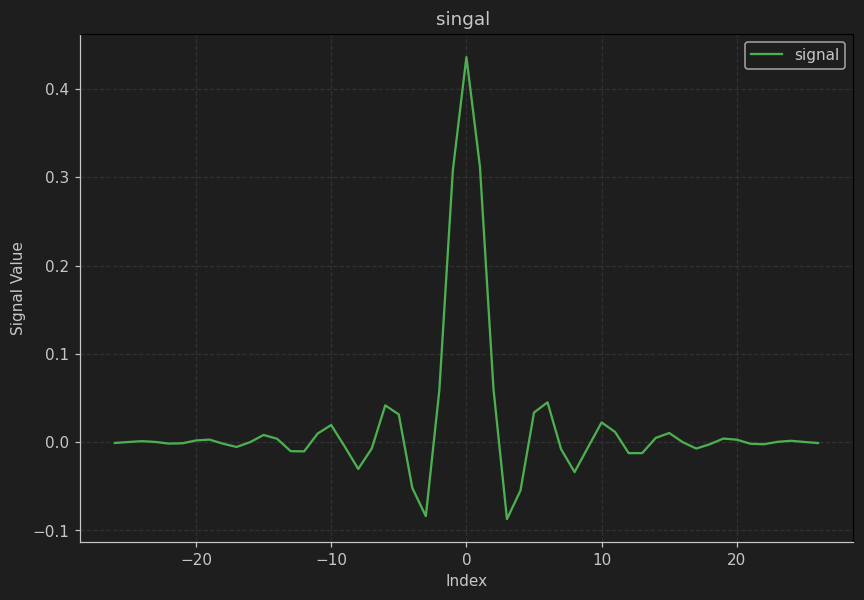

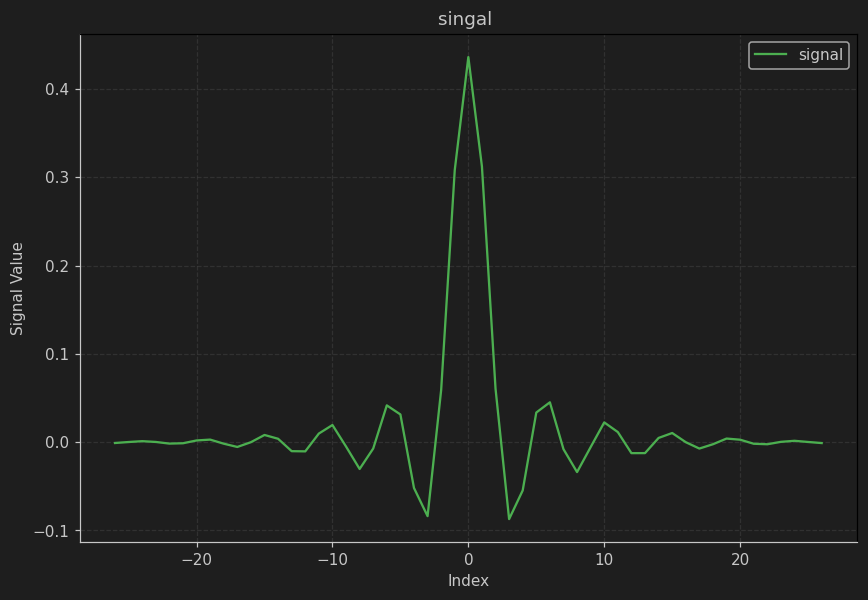

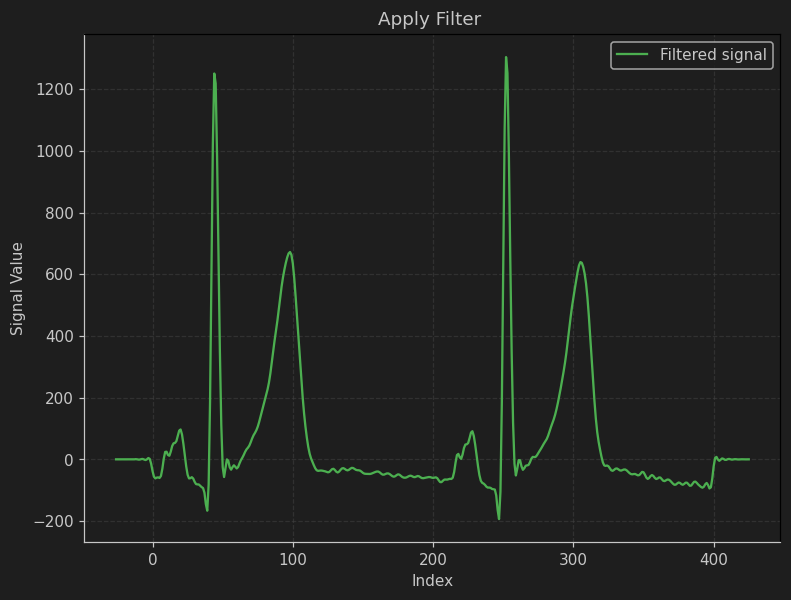

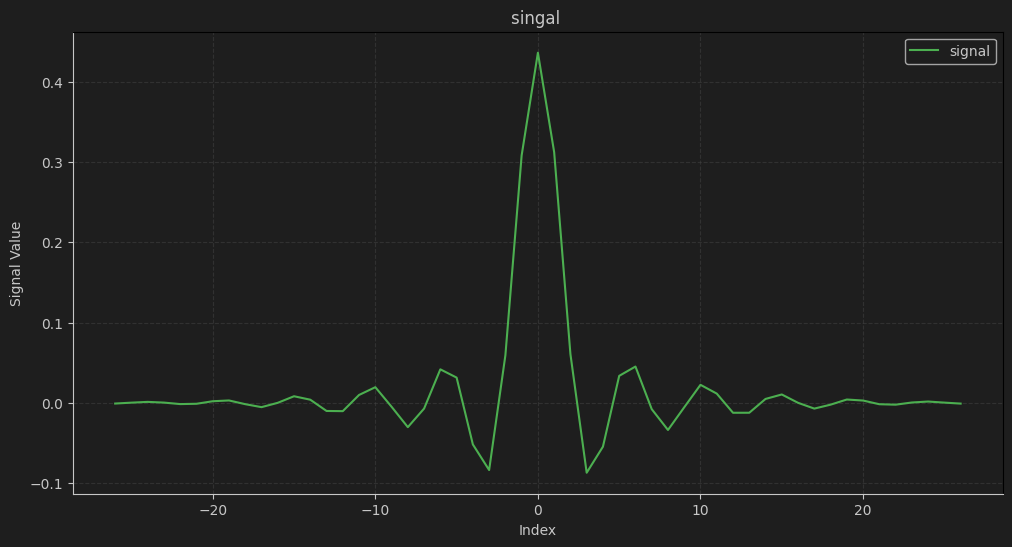

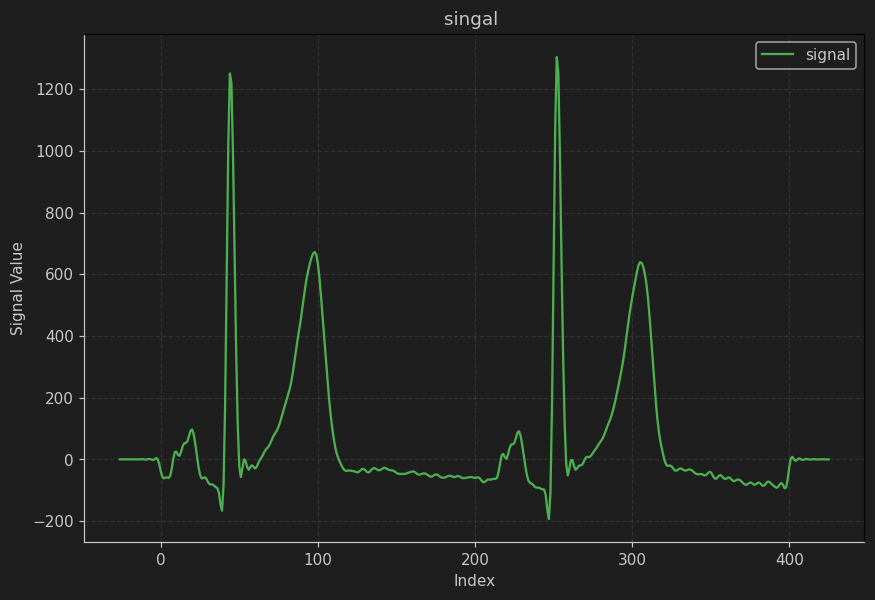

In [442]:

sv_ttk.set_theme("dark")
root.mainloop()
